In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [40]:
from google.colab import drive
drive.mount('/content/drive')
PATH_COMPLETO = '/content/drive/MyDrive/finance/Finance_data.csv'

# Carregar o dataset do Google Drive
try:
    df = pd.read_csv(PATH_COMPLETO)
    df_original = df.copy()
    print("Dataset 'Finance_data.csv' carregado com sucesso do Drive.")

except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado: {PATH_COMPLETO}")
    exit()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset 'Finance_data.csv' carregado com sucesso do Drive.


In [41]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Coluna de exemplo para demonstração dos outliers
example_col = 'age'
print(f"\n 16. Detecção de Outliers na coluna: {example_col}")

# Identificar outliers nas colunas numéricas:
# Z-score
z_scores = np.abs(stats.zscore(df[example_col]))
threshold_z = 3
outliers_z_score = df[z_scores > threshold_z]
print(f"Outliers (Z-score > 3): {len(outliers_z_score)} registros")

# IQR
Q1 = df[example_col].quantile(0.25)
Q3 = df[example_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df[example_col] < lower_bound) | (df[example_col] > upper_bound)]
print(f"Outliers (IQR): {len(outliers_iqr)} registros")
print("-" * 40)


 16. Detecção de Outliers na coluna: age
Outliers (Z-score > 3): 0 registros
Outliers (IQR): 0 registros
----------------------------------------


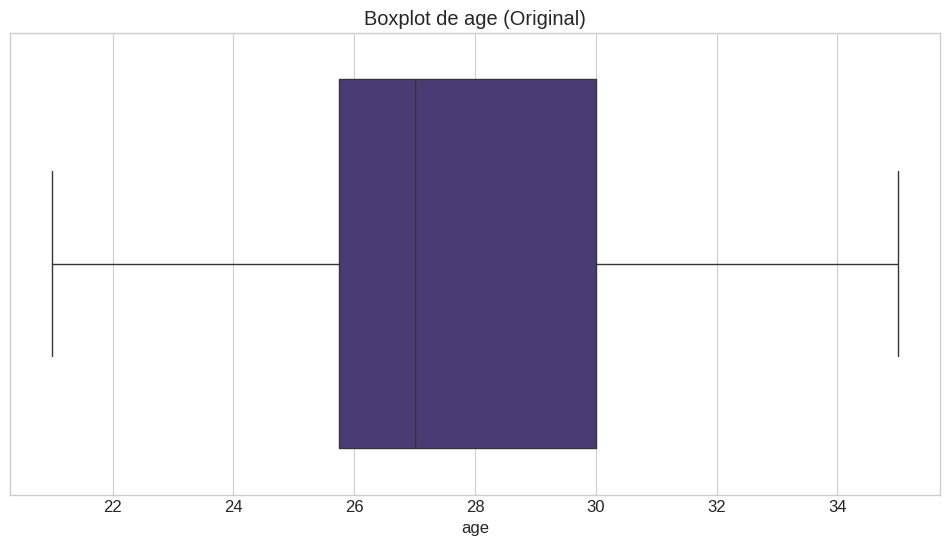

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[example_col])
plt.title(f'Boxplot de {example_col} (Original)')
plt.show()

In [43]:
# Implementar diferentes estratégias para lidar com outliers:

#Remoção
df_removed = df[~((df[example_col] < lower_bound) | (df[example_col] > upper_bound))].copy()
print(f"Estratégia 1 (Remoção): {len(df_original) - len(df_removed)} registros removidos.")

#Capping
df_capped = df_original.copy()
df_capped[example_col] = np.where(
    df_capped[example_col] > upper_bound,
    upper_bound,
    np.where(
        df_capped[example_col] < lower_bound,
        lower_bound,
        df_capped[example_col]
    )
)
print("Outliers substituídos por limites IQR.")

# Transformação
df_transformed = df_original.copy()
df_transformed[f'{example_col}_log'] = np.log1p(df_transformed[example_col])
print(" Coluna logarítmica criada.")
print("-" * 40)

print("Comparação do Impacto nas Estatísticas Descritivas")
stats_comparison = pd.DataFrame({
    'Original': df_original[example_col].describe(),
    'Remoção': df_removed[example_col].describe(),
    'Capping': df_capped[example_col].describe()
})
print(stats_comparison)

Estratégia 1 (Remoção): 0 registros removidos.
Outliers substituídos por limites IQR.
 Coluna logarítmica criada.
----------------------------------------
Comparação do Impacto nas Estatísticas Descritivas
        Original    Remoção    Capping
count  40.000000  40.000000  40.000000
mean   27.800000  27.800000  27.800000
std     3.560467   3.560467   3.560467
min    21.000000  21.000000  21.000000
25%    25.750000  25.750000  25.750000
50%    27.000000  27.000000  27.000000
75%    30.000000  30.000000  30.000000
max    35.000000  35.000000  35.000000


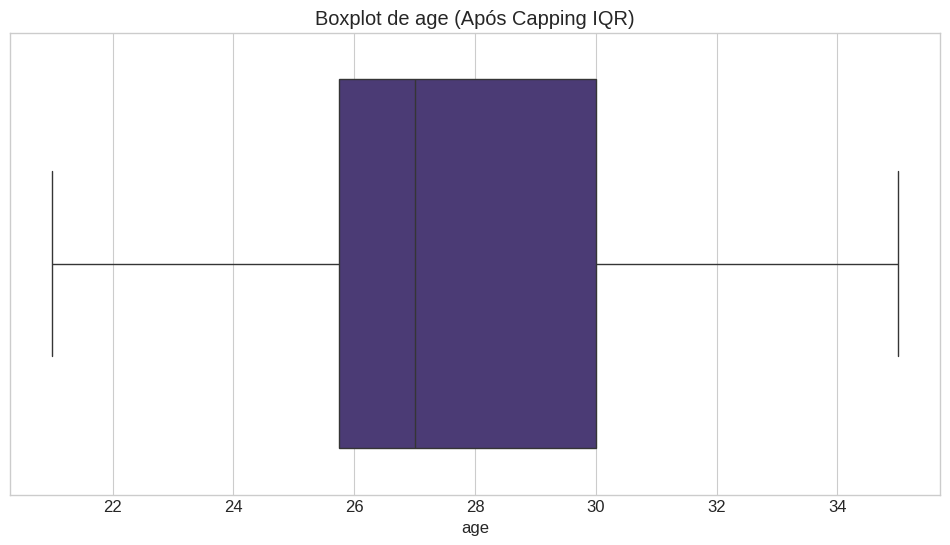

In [44]:
# Visualizar Boxplot após Capping
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_capped[example_col])
plt.title(f'Boxplot de {example_col} (Após Capping IQR)')
plt.show()